# CoDaS-HEP 2023: Machine Learning Introduction and Fundamentals

Material: numpy, linear regression.

In [2]:
import h5py

## Introduction

This notebook introduces Numpy and the 'simplest' ML model: linear regression.

## Working with `numpy`

A python library for handling arrays (matrices). Exercises adopted from this [lecture](https://compphysics.github.io/MachineLearningMSU/doc/pub/Introduction/html/Introduction.html).

In [3]:
# Start by importing

import numpy as np     

Let's initialize an array (vector) of 10 elements. These elements are deterimined by random numbers drawn from a normal distribution

In [4]:
x = np.random.normal(size=10)
print(x)

[-0.8569371   0.65797228  0.89655572  0.2977543  -0.88074563 -0.14837385
 -0.95924835 -0.32067061  1.07922472 -0.84118841]


You can also initialize an array with specific values

In [5]:
x = np.array([1, 2, 3])
print(x)

[1 2 3]


Indexing elements. Note that Python starts numbering elements from 0!

In [6]:
# Get the first element of x

print(x[0])

1


In [7]:
# Get the last element of x

print(x[-1])

3


You can also apply functions like log to an entire array

In [8]:
x=np.log(np.array([4, 7, 8]))

print(x)

[1.38629436 1.94591015 2.07944154]


Note: It's typically better to use the built in numpy functions because they're optimized!

Exercise: Write a NumPy program to convert the values of Centigrade degrees into Fahrenheit degrees. Centigrade values are stored into a NumPy array.

Hint: C/5=(F-32)/9

In [9]:
F = np.array([0, 12, 45.21, 34, 99.91])
C = (F - 32) * 5 / 9
print(C)
C_exp = np.array([-17.77777778, -11.11111111, 7.33888889, 1.11111111, 37.72777778])

assert np.all(np.isclose(C_exp, C, rtol=1e-05, atol=1e-08, equal_nan=False))

[-17.77777778 -11.11111111   7.33888889   1.11111111  37.72777778]


We can also make matrices in numpy (and tensors of higher dimension).

In [10]:
A = np.log(np.array([ [4.0, 7.0, 8.0], [3.0, 10.0, 11.0], [4.0, 5.0, 7.0] ]))

print(A)

[[1.38629436 1.94591015 2.07944154]
 [1.09861229 2.30258509 2.39789527]
 [1.38629436 1.60943791 1.94591015]]


You can get information about the matrix and easily slice it (i.e. select specific values)

In [11]:
# Get the matrix size
print("A size:", A.shape)

# Make a new matrix B=log(A)
B = np.log(np.array([ [4.0, 7.0, 8.0], [3.0, 10.0, 11.0], [4.0, 5.0, 7.0] ]))

# Print the first column, row-major order and elements start with 0
print("First column of B:", B[:,0]) 

A size: (3, 3)
First column of B: [1.38629436 1.09861229 1.38629436]


There are also functions to create matrices with certain values (0 or 1) or random values.

In [12]:
n = 1

# Define a matrix of dimension 10 x 10 and set all elements to zero
A = np.zeros( (n, n) )
print("A:", A)

# Define a matrix of dimension 10 x 10 and set all elements to one
B = np.ones( (n, n) )
print("B:", B)

# Define a matrix of dimension 10 x 10 and set all elements to random numbers with x \in [0, 1]
C = np.random.rand(n, n)
print("C:", C) 

A: [[0.]]
B: [[1.]]
C: [[0.9445759]]


## Jet Tagging: Introduction

The majority of particles produced in LHC events are unstable and immediately decay to lighter particles. The new particles can decay themselves to others in a so-called decay chain. Such a process terminates when the decay products are stable particles, e.g., charged pions. This collimated shower of particles with adjacent trajectories is called a *jet*. Jets are central to many physics studies at the LHC experiments. In particular, a successful physics program requires aggregating particles into jets (jet clustering), an accurate determination of the jet momentum (momentum measurement) and the identification of which particle kind started the shower (**jet tagging**).

In this excercise you will learn how to train a regressor. We will use some of jet features.

### Preparation of the training and validation samples

If you have already downloaded the datasets you can skip the cell below. In order to import the dataset: curl the dataset repository (to import the data in Colab), load the `h5` files in, extract the data we need: a target and jet features.

To type shell commands, we start the command line with !

In [13]:
! curl https://cernbox.cern.ch/s/6Ec5pGFEpFWeH6S/download -o ../Data-MLtutorial.tar.gz
! tar -xvzf ../Data-MLtutorial.tar.gz -C ../
! ls ../Data-MLtutorial/JetDataset/
! rm ../Data-MLtutorial.tar.gz 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  333M    0  333M    0     0  16.1M      0 --:--:--  0:00:20 --:--:-- 21.6M-- 4775k
x Data-MLtutorial/
x Data-MLtutorial/JetDataset/
x Data-MLtutorial/JetDataset/jetImage_7_100p_0_10000.h5
x Data-MLtutorial/JetDataset/jetImage_7_100p_10000_20000.h5
x Data-MLtutorial/JetDataset/jetImage_7_100p_30000_40000.h5
x Data-MLtutorial/JetDataset/jetImage_7_100p_40000_50000.h5
x Data-MLtutorial/JetDataset/jetImage_7_100p_50000_60000.h5
x Data-MLtutorial/JetDataset/jetImage_7_100p_60000_70000.h5
x Data-MLtutorial/JetDataset/jetImage_7_100p_70000_80000.h5
x Data-MLtutorial/JetDataset/jetImage_7_100p_80000_90000.h5
jetImage_7_100p_0_10000.h5     jetImage_7_100p_50000_60000.h5
jetImage_7_100p_10000_20000.h5 jetImage_7_100p_60000_70000.h5
jetImage_7_100p_30000_40000.h5 jetImage_7_100p_70000_80000.h5
jetImage_7_100p_40000_50000.h5 jetImage_7_10

In [19]:
# Load the dataset

target = np.array([])
inputs = np.array([])

datafiles = ['../Data-MLtutorial/JetDataset/jetImage_7_100p_0_10000.h5']

for file_ in datafiles:
    with h5py.File(file_, 'r') as f:
        print("Appending {}".format(file_))
        jets = np.array(f.get('jets'))
        tmp_inputs = np.array(f.get("jets"))[:,[5, 10]] # That's `j_tau2_b1` and `j_tau32_b1`
        tmp_target = np.array(f.get('jets'))[:,6] # That's `j_tau3_b1`
        inputs = np.concatenate([inputs, tmp_inputs], axis=0) if inputs.size else tmp_inputs
        target = np.concatenate([target, tmp_target], axis=0) if target.size else tmp_target
          
print(target.shape, inputs.shape)

Appending ../Data-MLtutorial/JetDataset/jetImage_7_100p_0_10000.h5
(10000,) (10000, 2)


/var/folders/gy/cx8hghwn7g3g8b9gn8fy6x740000gn/T/ipykernel_92026/295670125.py:11: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  jets = np.array(f.get('jets'))
/var/folders/gy/cx8hghwn7g3g8b9gn8fy6x740000gn/T/ipykernel_92026/295670125.py:12: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  tmp_inputs = np.array(f.get("jets"))[:,[5, 10]] # That's `j_tau2_b1` and `j_tau32_b1`
/var/folders/gy/cx8hghwn7g3g8b9gn8fy6x740000gn/T/ipykernel_92026/295670125.py:13: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  tmp_target = np.array(f.get('jets'))[:,6] # That's `j_tau3_b1`


In this simple exercise we will try to regress value of $\tau_{3}$ using $\tau_{2}$ and $\tau_{32}$. We could first see, how well can we fit the data using an analytical solution.

In [21]:
from sklearn.linear_model import LinearRegression

inputs = inputs / 100. # Prevents numerical issues

reg = LinearRegression().fit(inputs, target)
print("The resulting equation: {}x + {} has a R2 score of {}".format(
    reg.coef_,
    reg.intercept_,
    reg.score(inputs, target)))

The resulting equation: [  62.36727086 3468.48591801]x + -24.697805784361414 has a R2 score of 0.8940855664261481


Now, let's try to implement an alternative solution that uses [gradient descent](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html). Note that this exercise is just for your learning on how to optimize models according to a gradient as a way of minimizing a loss function: **(Mean Square Error)**, given by:

$L(y, f(x)) = \frac{1}{2n} \sum\limits^{n} (y - w^TX)^2$

**Methods to implement (in order):**

- `init_weights` - accepts an input `num_features` and sets the `coef_` and `intercept_` attributes to random values drawn from a normal distribution with mean 0 and standard deviation 1. Use a numpy array for `coef_` and a float for `intercept_`
- `score` - accepts inputs `X` and `y_true` and outputs the $R^2$ score of the model.
- `calc_loss` - accepts inputs `X` and `y_true` as numpy arrays. Calculates and returns the Mean Square Error loss metric with the current parameters.
- `predict` - accepts an input `X` and outputs a prediction numpy array using the current parameters.
- `fit` - accepts inputs `X`, `y_true` and default kwargs `max_iter`, `learning_rate` and fits a model using gradient descent. Should call `calc_grad` to get gradients from current parameters and update the parameters using the gradient.
- `calc_grad` - accepts inputs `X` and `y_true` and, using the current parameters, outputs the gradients ([coef_grad, intercept_grad]). Does not update the parameters.

**Expected R2: 0.73**

In [22]:
class LinearRegressionModel():

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def init_weights(self, num_features):
        """Accepts an input num_features and sets the coef_
        and intercept_ attributes to random values drawn from a normal distribution
        with mean 0 and standard deviation 1.
        Use a numpy array for coef_ and a float for intercept_"""
        # Hint: use `np.random.normal`
        self.coef_ = np.random.normal(size=num_features)
        self.intercept_ = np.random.normal()
        
    def score(self, X, y_true):
        """Accepts inputs X and y_true and outputs the r2 score of the model."""
        y_pred = self.predict(X)
        u = ((y_true - y_pred)**2).sum()
        v = ((y_true - y_true.mean())**2).sum()
        return 1 - u/v

    def calc_loss(self, X, y_true):
        """Calculates the loss value using current coef/intercept values"""
        y_pred = self.predict(X)
        return np.mean((y_pred - y_true)**2)/2.

    def predict(self, X):
        """Creates a prediction with the current coef/intercept values"""
        return (X@self.coef_ + self.intercept_)

    def fit(self, X, y_true, max_iter=10000, learning_rate=0.01):
        """Optimizing models according to a gradient as a way of minimizing loss.
        Should update the coef_ and intercept_ attributes"""
        # Hint: https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html#step-by-step
        for _ in range(max_iter):
            coef_grad, intercept_grad = self.calc_grad(X, y_true)
            self.coef_ -= learning_rate * coef_grad
            self.intercept_ -= learning_rate * intercept_grad
    
    def calc_grad(self, X, y_true):
        """Calculates gradients for coef/intercept values"""
        res = y_true - self.predict(X)
        res_mat = np.tile(res.reshape(-1, 1), (1, X.shape[1]))
        coef_grad = -1 * np.mean(res_mat * X, axis=0)
        intercept_grad = -1 * np.mean(res)
        return coef_grad, intercept_grad

In [23]:
my_regressor = LinearRegressionModel()
my_regressor.init_weights(2)
my_regressor.fit(inputs, target)

In [24]:
print("The resulting equation: {}x + {} has a R2 score of {}".format(
    my_regressor.coef_,
    my_regressor.intercept_,
    my_regressor.score(inputs, target)))

The resulting equation: [43.07816913  1.21793085]x + 5.355425364085874 has a R2 score of 0.7356654248772913


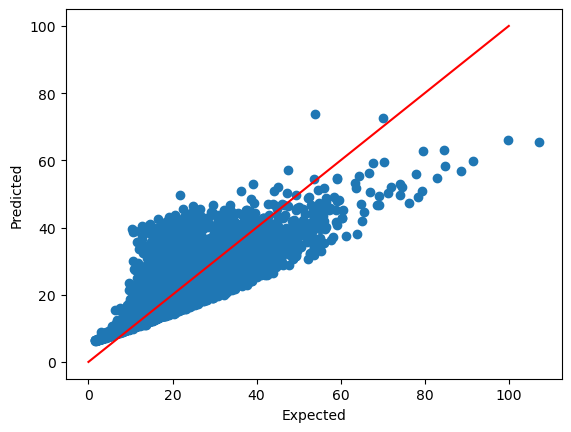

In [26]:
import matplotlib.pyplot as plt

plt.scatter(target, my_regressor.predict(inputs))
plt.plot([0, 100], [0, 100], 'r')
plt.xlabel('Expected')
plt.ylabel('Predicted');